# Домашнее задание 2

Это домашнее задание по материалам второго семинаров. Дедлайн по отправке - 23:55 17 февраля. 

Домашнее задание выполняется в этом же Jupyter Notebook'e и присылается мне на почту: __beznosikov.an@phystech.edu__.

Решение каждой задачи необходимо поместить после её условия.

Файл должен называться: Фамилия_Имя_Optimization_HW_2

При полном запуске Вашего решения (Kernel -> Restart & Run All) все ячейки должны выполняться без ошибок. 

## Задача 1

Рассмотрим проекцию на единичном $\ell_1$-шар:
\begin{equation*}
    \text{proj}_{C}(x) = \arg\min_{y \in C} \|x-y\|^2,
\end{equation*}
где $C = \{x ~|~ \|x\|_1 \leq 1 \}$.

__(а)__ Найдите выражение для такой проекции в явном виде.

Поставим двойстевенную задачу к данной.  

Определим $g(\lambda) = inf_{y \in C} L(y, \lambda) = inf_{y \in C} \ ||x - y||^{2} + 2\lambda||y||_{1} - 2\lambda$  

Найдем минимум лагранжина.

$L = \sum_{i = 1}^{n} \ [(x_{i} - y_{i})^2 + 2\lambda|y|_{i}] - 2\lambda$ 


$L = \sum_{i = 1}^{n} \ g_{i} - 2\lambda$ 

$g_{i} = (x_{i} - y_{i})^2 + 2\lambda|y|_{i}$ 

$\partial g_{i} = 2(x_{i} - y_{i}) + 2\lambda  \partial|y|_{i}$ 

\begin{equation}  
    \partial g_{i} = \begin{cases}  
    2(y_{i} - x_{i}) + 2\lambda, & y_{i} > 0 \\ 
    2(y_{i} - x_{i}) - 2\lambda, & y_{i} < 0 \\
    2(y_{i} - x_{i}) + 2\lambda [-1, 1], & y_{i} = 0 
   \end{cases} 
\end{equation} 

Из критерия, о минимуме, получаем что $0 \in \partial g_{i}$

Следовательно, получаем, что оптимальный y_{i}  

\begin{equation}  
    y_{i} = \begin{cases}  
    x_{i} - \lambda, & x_{i} > \lambda  \\ 
    x_{i} + \lambda, & x_{i} < -\lambda \\ 
    0, & -\lambda \leq x_{i} \leq \lambda 
   \end{cases} 
\end{equation}  



Подставляем обратно в $g_{i}$, получаем:  
\begin{equation}  
    g_{i} = \begin{cases}  
    -(\lambda - |x_{i}|)^2 + x_{i}^2 & |x_{i}| > \lambda \\
    x_{i}^2 & |x_{i}| \leq \lambda
   \end{cases} 
\end{equation}  

Ну то есть теперь понятно чему равно $g(\lambda)$ 

Теперь мы готовы поставить двойственную задачу: 
\begin{equation}  
    maximize \ g(\lambda) \\ 
    subject \ to \ \lambda \geq 0
\end{equation} 

Сразу отметим, что в исходной задаче оптимизации, если $x \in C$, то $y = x$ и $proj(x) = x$   

Допустим это не так. Решим задачу, когда $||x||_{1} > 1$. Сразу отметим, что условие Слейтера выполняется, то есть найдется такой $||y||_{1} < 1$. То есть получаем, что решение двойственной задачи совпдает с исходной.   



Посчитаем теперь производную $g_{i}$ по $\lambda$. 
\begin{equation} 
g_{i}'(\lambda) = \begin{cases}
2(|x_{i}| - \lambda) &  |x_{i}| \geq \lambda \\ 
0 & |x_{i}| \leq \lambda
\end{cases}
\end{equation}

\begin{equation} 
     g'(\lambda) = 2\sum_{i}^{n}max(|x_{i}| - \lambda, 0) - 2
\end{equation}  

Отсопртируем все $x_{i}$, так что: 

\begin{equation}  
    |x_{1}| < |x_{2}| < ... < |x_{n}|
\end{equation}

Поэтому, мы ищем такой $\lambda$, что $g'(x_{i}) \geq 0 \ and \ g'(x_{i + 1}) \leq 0$   

Такой найдется, так как мы сначала договрились, что $||x||_{1} \geq 1$ и ясно, что функция $g'(\lambda)$ убывает 

Оптимальный $\lambda$ есть, 

\begin{equation} 
    \lambda = \frac{\sum_{j = i + 1}^{n} x_{j} - 1}{n - i}
\end{equation} 

Подставим этот  $\lambda$ в $y(\lambda)$, получим: 

\begin{equation}  
    y_{i} = \begin{cases}  
    x_{i} - \frac{\sum_{j = i + 1}^{n} |x_{j}| - 1}{n - i}, & x_{i} > \frac{\sum_{j = i + 1}^{n} |x_{j}| - 1}{n - i}  \\ 
    x_{i} + \frac{\sum_{j = i + 1}^{n} |x_{j}| - 1}{n - i}, & x_{i} < -\frac{\sum_{j = i + 1}^{n} |x_{j}| - 1}{n - i} \\ 
    0, & -\lambda \leq x_{i} \leq \lambda 
   \end{cases} 
\end{equation}  

__(б)__ Сравните:
\begin{equation*}
    \text{proj}_C (x) \quad \text{и} \quad \text{prox}_{\lambda \mathbb{I}_C} (x),
\end{equation*}
где $\lambda > 0$, а $\mathbb{I}_C$ - индикаторная функция множества $C$:
$$
\mathbb{I}_C = 
\begin{cases}
0 ,& x \in C \\
+\infty, &x \notin C.
\end{cases}
$$
Являются ли данные операторы эквивалентными для любых $\lambda > 0$ и выпуклых $C$?

Допустим $x \notin C$, ну тогда получается, что $prox_{\lambda\mathbb{I}_C}(x) = \cfrac{1}{2}||x - y||^2 + \infty$, что не сходится с реальностью. 

## Задача 2

Рассмотрим задачу минимизации эмпирического риска:
\begin{equation}
\min_{w \in \mathbb{R}^d} \frac{1}{n} \sum\limits_{i=1}^n l (g(w, x_i), y_i),
\end{equation}
где $l$ - функция потерь, $g$ - модель, $w$ - параметры модели, $\{x_i, y_i\}_{i=1}^n$ - выборка данных из векторов признаков $x_i$ и меток $y_i$.

Далее будем рассматривать линейной модель $g(w, x) = w^T x$ и квадратичную функцию потерь $l(z, y) = (z-y)^2$.

__(а)__ Запишите задачу минимизации эмпирического риска с линейной моделью  и квадратичной функцией потерь в векторно-матричном виде, используя $X$ - матрицу из векторов $\{x_i\}$ и вектор $y$ - из $\{y_i\}$.

Функцию ошибки обозначим за $Q$.Тогда задача ставится, как $ min_{\omega} Q = min_{omega}||X\omega - y|| $ 

__(б)__ К заданию приложен датасет _mushrooms_. С помощью следующего кода сформируйте матрицу $X$ и вектор $y$:

In [1]:
dataset = "mushrooms.txt" 
#файл должен лежать в той же деректории, что и notebook

In [2]:
from sklearn.datasets import load_svmlight_file
data = load_svmlight_file(dataset)
X, y = data[0].toarray(), data[1]
n, d = X.shape 

In [3]:
print(y.shape[0]) 
print("сolumns:", X.shape[1]) 

8124
сolumns: 112


Разделите (лучше случайно) данные (а значит $X$ и $y$) на две части: обучающую и тестовую (примерно в отношении $4$ к $1$). Опишите, как это было сделано.

In [4]:
import numpy as np  
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

__(в)__ Для обучающей части $X_{train}$, $y_{train}$ оцените константу $L$ задачи обучения/оптимизации. Будет ли задача выпуклой? Сильно выпуклой?

 $\nabla Q = 2X^T(X\omega - y)$, 
 
Константа Липшица по определению градиентов 

$||\nabla Q(\omega_{1}) - \nabla Q(\omega_{2})|| \leq L||\omega_{1} - \omega_{2}||$ 

Значит $L = sup_{\omega} \cfrac{||\nabla Q(\omega_{1}) - \nabla Q(\omega_{2})||}{||\omega_{1} - \omega_{2}||}= sup_{\omega} \cfrac{||2X^TX(\omega_{1} - \omega_{2}||}{||\omega_{1} - \omega_{2}||}$ 

Или можно оценить максимальное собственное значение матрицы $2X^TX$

In [5]:
from numpy import linalg  

w, v = np.linalg.eig(2 * X.T @ X) 
print('L is equal to', max(w)) 
print('Mu is equal to', min(w)) 
L = max(w)

L is equal to (168083.2354899167+0j)
Mu is equal to (-9.104614230247668e-13+0j)


Отсюда видно, что задача выпуклая, т.к L > 0, но не является сильно выпуклой, т.к $\mu \sim$ 0

__(г)__ Используя материалы прошлого ДЗ (по желанию), решите задачу оптимизации/обучите модель машинного обучения с помощью градиентного спуска. Изобразите график сходимости. Какой критерий сходимости будет использовать? Сделайте вывод. Опишите проблемы, с которыми пришлось столкнуться.

In [6]:
class GradientDescent: 
    def __init__(self, max_iter=10000, alpha =1e-3, epsilon=1e-4): 
        self.max_steps = max_iter
        self.alpha = alpha
        self.w = None 
        self.converges_history = [] 
        self.epsilon = epsilon  
        self.w_history = []
        self.converge = False
    
    def grad(self, w):
        return 2 * np.dot(X.T, (np.dot(X, w) - y))   

    def fit(self, X, y):  
        self.w = np.random.normal(loc=100, size=(X.shape[1])) 
        new_w = np.zeros(X.shape[1])
        for i in range(self.max_steps):  
            new_w = self.w - self.alpha * self.grad(self.w) 
            self.converges_history.append(np.linalg.norm(self.w - new_w)**2)  
            self.w_history.append(new_w)
            if(np.linalg.norm(self.w - new_w)**2 < 1e-4): 
                self.converge = True
            self.w = new_w  
        return self  

    def predict(self, X): 
        y_predicted = np.dot(X, self.w)   
        for i in range(len(y_predicted)): 
            if(np.absolute(y_predicted[i] - 1) <= np.absolute(y_predicted[i] - 2)): 
                y_predicted[i] = 1 
            else: 
                y_predicted[i] = 2  
        return y_predicted 
        
    def accuracy(self, y_predicted, y_test): 
        return (np.sum(y_predicted == y_test))/(y_test.shape[0]) 

In [7]:
gd = GradientDescent(100000, 1/L)  
gd.fit(X_train, y_train)   

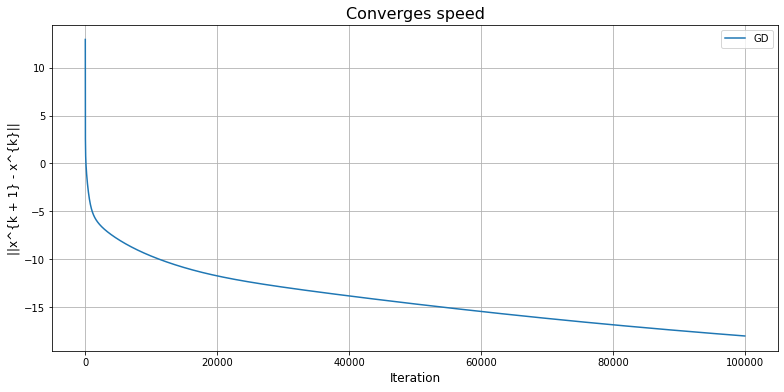

In [8]:
import matplotlib.pyplot as plt   
plt.figure(figsize=(13, 6)) 
plt.plot(range(len(gd.converges_history)), np.log(gd.converges_history), label='GD') 
plt.title('Converges speed', fontsize=16) 
plt.legend() 
plt.xlabel('Iteration', fontsize=12) 
plt.ylabel('||x^{k + 1} - x^{k}||', fontsize=12) 
plt.grid()
plt.show()

__(д)__ Как использовать итоговую модель для предсказания? Ответив на вопрос, сделайте предсказания на тестовой выборке. Сравните с реальными метками. Количество правильно угаданных меток есть точность/accuracy вашей модели. Запустите еще раз процесс обучения из пункта г), постройте как меняется точность модели от номера итерации градиентного спуска (измеряйте не каждую итерацию, а, например, каждую 100 или 1000). 

In [9]:
y_predicted = gd.predict(X_test)  
print(gd.accuracy(y_predicted, y_test))

0.9993846153846154


In [10]:
accuracy_history = []  
for i in range(100, len(gd.w_history), 100): 
    y_pred = np.dot(X_test, gd.w_history[i]) 
    for i in range(y_pred.shape[0]): 
        if(np.absolute(y_pred[i] - 1) <= np.absolute(y_pred[i] - 2)): 
            y_pred[i] = 1 
        else: 
            y_pred[i] = 2
            
    accuracy_history.append((np.sum(y_pred == y_test))/y_test.shape[0]) 

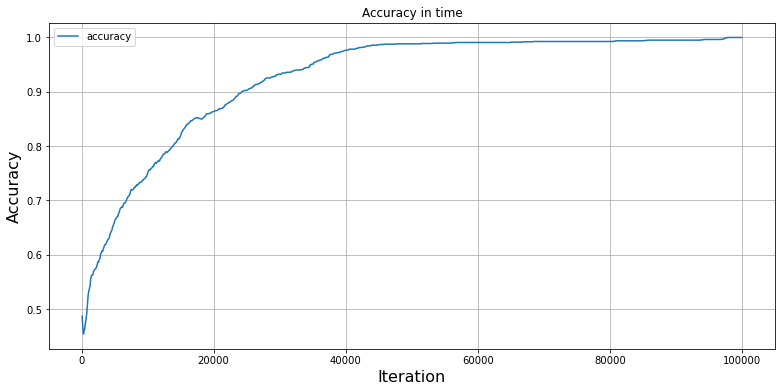

In [11]:
plt.figure(figsize=(13, 6)) 
plt.plot(range(100, len(gd.w_history), 100), accuracy_history, label='accuracy') 
plt.title('Accuracy in time') 
plt.legend() 
plt.xlabel('Iteration', fontsize=16) 
plt.ylabel('Accuracy', fontsize=16) 
plt.grid() 
plt.show()

__(e)__ Теперь рассмотрим эту же задачу обучения на $\ell_1$-шаре с радиусом $\lambda$. Повторите пункты г) и д) только теперь градиентный спуск должен быть модифицирован с помощью оператора проекции. Пробуйте различные $\lambda > 0$ и найдите лучшее (опишите почему именно такое лучшее). Удалось ли улучшить процесс обучения/точность модели на тестовой выборке? 

In [12]:
#на вход вектор и радиус шара  
def projl1(x, r):   
    s = 0
    for i in range(x.shape[0]): 
        s += np.absolute(x[i]) 
    if(s <= 1): 
        return x  
    
    x_sorted = np.sort(np.absolute(x)) 
    g_derivative = np.zeros(x.shape[0] + 1)   
    
    sum_x_sorted = np.sum(np.absolute(x_sorted)) 
    cur_sum = 0 
    g_derivative[0] = sum_x_sorted - r
    for i in range(x_sorted.shape[0]): 
        g_derivative[i + 1] = ((i + 1) - x.shape[0]) * np.absolute(x_sorted[i]) + sum_x_sorted - (cur_sum + np.absolute(x_sorted[i])) - r 
        cur_sum += np.absolute(x_sorted[i]) 
    
    k = -1
    for i in range(1, g_derivative.shape[0], 1): 
        if(g_derivative[i - 1] >= 0 and g_derivative[i] <= 0): 
            k = i - 1   
            break 
    
    cur_sum = 0
    for i in range(k, x_sorted.shape[0], 1): 
        cur_sum += np.absolute(x_sorted[i])    
    
    optimal = (cur_sum - r) / (x_sorted.shape[0] - k) 
    
    result_projection = np.zeros(x.shape[0]) 
    for i in range(result_projection.shape[0]): 
        if(x[i] > optimal): 
            result_projection[i] = x[i] - optimal 
        elif(x[i] < -optimal): 
            result_projection[i] = x[i] + optimal 
        else: 
            result_projection[i] = 0  
    return result_projection 

In [13]:
x = np.array([0.7, -0.6, -0.2, -1])
r = 1 
print(projl1(x, r))  

[ 0.26666667 -0.16666667  0.         -0.56666667]


In [14]:
class GradientDescentProjection: 
    def __init__(self, max_iter=10000, alpha =1e-3, epsilon=1e-4, l = 1): 
        self.max_steps = max_iter 
        self.l = l
        self.alpha = alpha
        self.w = None 
        self.converges_history = [] 
        self.epsilon = epsilon  
        self.w_history = []
        self.converge = False
    
    def grad(self, w):
        return 2 * np.dot(X.T, (np.dot(X, w) - y))   

    def fit(self, X, y):  
        self.w = np.random.normal(loc=100, size=(X.shape[1])) 
        new_w = np.zeros(X.shape[1])
        for i in range(self.max_steps):  
            new_w = projl1(self.w - self.alpha * self.grad(self.w), self.l)
            self.converges_history.append(np.linalg.norm(self.w - new_w)**2)  
            self.w_history.append(new_w)
            if(np.linalg.norm(self.w - new_w)**2 < 1e-4): 
                self.converge = True
            self.w = new_w  
        return self  

    def predict(self, X): 
        y_predicted = np.dot(X, self.w)   
        for i in range(len(y_predicted)): 
            if(np.absolute(y_predicted[i] - 1) <= np.absolute(y_predicted[i] - 2)): 
                y_predicted[i] = 1 
            else: 
                y_predicted[i] = 2  
        return y_predicted 
        
    def accuracy(self, y_predicted, y_test): 
        return (np.sum(y_predicted == y_test))/(y_test.shape[0]) 

In [15]:
gd2 = GradientDescentProjection(10000, 1/L, epsilon=1e-4, l=10)  
gd2.fit(X_train, y_train) 

/tmp/ipykernel_1140347/210479997.py:34: ComplexWarning: Casting complex values to real discards the imaginary part
  result_projection[i] = x[i] - optimal
/tmp/ipykernel_1140347/210479997.py:36: ComplexWarning: Casting complex values to real discards the imaginary part
  result_projection[i] = x[i] + optimal


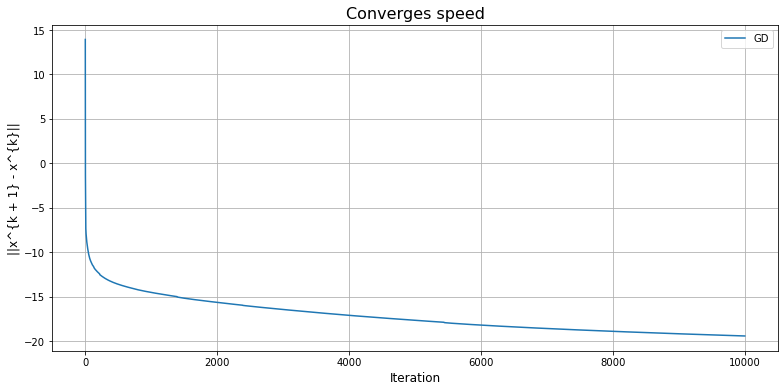

In [16]:
plt.figure(figsize=(13, 6)) 
plt.plot(range(len(gd2.converges_history)), np.log(gd2.converges_history), label='GD') 
plt.title('Converges speed', fontsize=16) 
plt.legend() 
plt.xlabel('Iteration', fontsize=12) 
plt.ylabel('||x^{k + 1} - x^{k}||', fontsize=12) 
plt.grid()
plt.show() 

In [17]:
y_predicted = gd2.predict(X_test)  
print(gd2.accuracy(y_predicted, y_test)) 

0.9993846153846154


In [18]:
accuracy_history = []  
for i in range(100, len(gd2.w_history), 100): 
    y_pred = np.dot(X_test, gd2.w_history[i]) 
    for i in range(y_pred.shape[0]): 
        if(np.absolute(y_pred[i] - 1) <= np.absolute(y_pred[i] - 2)): 
            y_pred[i] = 1 
        else: 
            y_pred[i] = 2
            
    accuracy_history.append((np.sum(y_pred == y_test))/y_test.shape[0]) 

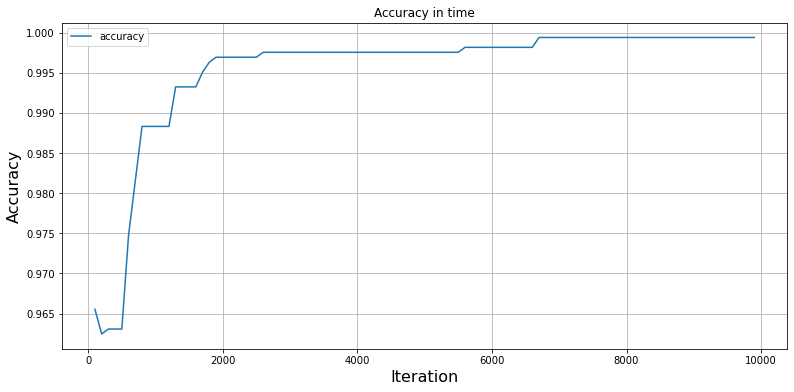

In [19]:
plt.figure(figsize=(13, 6)) 
plt.plot(range(100, len(gd2.w_history), 100), accuracy_history, label='accuracy') 
plt.title('Accuracy in time') 
plt.legend() 
plt.xlabel('Iteration', fontsize=16) 
plt.ylabel('Accuracy', fontsize=16) 
plt.grid() 
plt.show()

Чем больше радиус шара, тем лучше точность, но тем дольше работает алгоритм, в итоге вынуждены искать баланс, между скоростью и качеством. 

__Бонусные пункт__

__(ж)__ Снова рассмотрим задачу обучения без ограничений, но добавим к ней регуляризатор 1) $\lambda \| x \|_1$ c $\lambda  > 0$, 2) $\lambda \| x \|_2$ c $\lambda  > 0$. Сможем ли для новой задачи с регуляризатором использовать честный градиентный спуск без модификаций? Почему? Предложите свои идеи, как модифицировать градиентный спуск для новой задачи. Проведите для него эксперименты из пунктов г) и д).  Пробуйте различные $\lambda > 0$ и найдите лучшее (опишите почему именно такое лучшее). Сравните результаты с пунктом e).

In [20]:
#ответ

__(з)__ Воспользуемся для нашей задачи методом [PCA](https://ru.wikipedia.org/wiki/Метод_главных_компонент). Прочитайте про него подробнее и опишите основную идею.

In [21]:
#ответ 


Следующий код запускает PCA для нашего датасета. Убедитесь, что понимаете происходящие.

In [22]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
pca.fit(X_train)  #эта строчка будет работать только если есть матрица X_train
print (pca.explained_variance_ratio_.cumsum())

[0.17105948 0.30230759 0.39600739 0.45841994 0.4986626  0.53641086
 0.56906108 0.59689851 0.62378957 0.64579721]
